In [142]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-0.24.1-cp39-cp39-macosx_10_13_x86_64.whl (7.3 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
     |████████████████████████████████| 30.9 MB 77.1 MB/s eta 0:00:01.2 MB/s eta 0:00:05
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


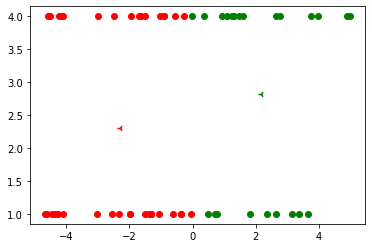

In [138]:
#K-means
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from sklearn.neighbors import kneighbors_graph
def generateGraph(S,n):
    s = S[0].shape[0]
    L = np.zeros((s,s))
    for i in range(s):
        for j in range(s):
            if(i == j):
                L[i][j] = 0
            else:
                L[i][j] = int(distance([S[0][i],S[1][i]],[S[0][j],S[1][j]]) < n)        
    return np.diag(L.sum(axis=1)) - L

def getCenter(S):
    return [np.mean(S[0]),np.mean(S[1])]

def distance(a,b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def split(S,c1,c2):
    g1x = []
    g1y = []
    g2x = []
    g2y = []

    for i,j in zip(S[0],S[1]):
        e = [i,j]
        if(distance(e,c1) >= distance(e,c2)):
            g1x.append(e[0])
            g1y.append(e[1])

        else:
            g2x.append(e[0])
            g2y.append(e[1])

    return [g1x,g1y],[g2x,g2y]

# lines
x = np.concatenate([np.random.uniform(-5, 5, size=30),np.random.uniform(-5, 5, size=30)])
y = np.concatenate([np.random.uniform(1, 1, size=30),np.random.uniform(4, 4, size=30)])
S = [x,y]

#circles
#S, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

#moons
#S, labels = make_moons(n_samples=500, noise=0.1)

S = S
c1 = np.random.uniform(-1,7,size=2)
c2 = np.random.uniform(-1,7,size=2)


#lloyds allgorithm

for i in range(10):
    g1, g2 = split(S,c1,c2)
    c1 = getCenter(g1)
    c2 = getCenter(g2)


#p = getCenter(S)
#split into groups


M = generateGraph(S,2)


eigenValues, eigenVectors = LA.eig(M)

idx = eigenValues.argsort()[::-1]   
eigenValues = np.rint(eigenValues[idx])
eigenVectors = np.real(np.rint(eigenVectors[:,idx]))

#draw graphs
plt.scatter(g1[0],g1[1],color='g')
plt.scatter(g2[0],g2[1],color='r')

plt.scatter(c1[0],c1[1], color = 'g', marker = '3')
plt.scatter(c2[0],c2[1], color = 'r', marker = '3')




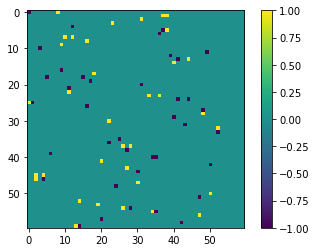

In [139]:
plt.imshow(eigenVectors)
plt.colorbar()
plt.show()


In [140]:
vals, vecs = np.linalg.eig(M)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# use Fiedler value to find best cut to separate data
clusters = vecs[:,1] > 0
print(clusters)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


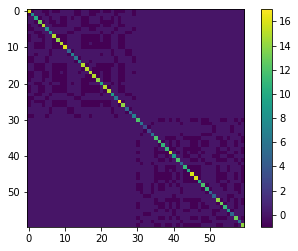

In [141]:
plt.imshow(M)
plt.colorbar()
plt.show()


In [142]:
#Flexible k-means
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from sklearn.neighbors import kneighbors_graph
import numpy as np

# create the data
#X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)
X = np.array(S).T

#X, labels = make_moons(n_samples=500, noise=0.1)
# use the nearest neighbor graph as our adjacency matrix
A = kneighbors_graph(X, n_neighbors=7).toarray()
print(A)

# create the graph laplacian
L = kneighbors_graph(X, n_neighbors=7).toarray() - np.diag(A.sum(axis=1))
#L = generateGraph(S,3) <--- Less accurate than out of box solution

# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# get bottom
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# find clusters
clusters = vecs[:,1] > 0
s = X[clusters]
t = X[~clusters]

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


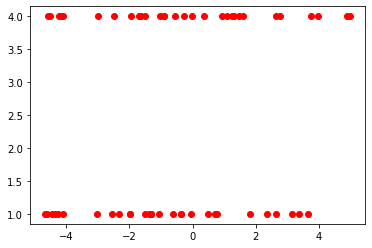

In [143]:
plt.scatter(s[:,0],s[:,1],color='g')
plt.scatter(t[:,0],t[:,1],color='r')

plt.show()
